# Preprocessing

In [333]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns

#random seed
np.random.seed(4324)

In [334]:
pd.set_option("display.max_columns", None)

In [335]:
df = pd.read_csv('../Data/our_data.csv')

In [336]:
df.head()

,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $
0,Kansas City,1996-08-16,"Crime,Drama,Music",116.0,Robert Altman,"director,producer,writer",1925,2006,6.3,5077.0,3.823171,19000000,1353824,1353824
1,Sommersby,1993-02-05,"Drama,Mystery,Romance",114.0,Jon Amiel,"director,producer,script_department",1948,alive,6.2,22262.0,4.434679,30000000,50081992,140081992
2,We Bought a Zoo,2011-12-23,"Comedy,Drama,Family",124.0,Cameron Crowe,"writer,producer,director",1957,alive,7.1,145614.0,6.078636,50000000,75624550,118729073
3,The Spy Who Loved Me,1977-07-13,"Action,Adventure,Thriller",125.0,Lewis Gilbert,"director,writer,producer",1920,2018,7.0,110757.0,5.850243,14000000,46800000,185400000
4,Next Friday,2000-01-12,Comedy,98.0,Steve Carr,"director,producer",\N,alive,6.1,41748.0,4.643223,9500000,57176582,59675307


## Feature Engineering

### Brakujące wartości

In [337]:
print('wartości brakujące w postaci "-":') #w większości tylko jeśli w ogóle nie ma info o reżyserze
for col in df.columns:
    if df[col][df[col] == '-'].count() > 0:
        print(col, df[col][df[col] == '-'].count())

print('\nwartości brakujące w postaci "\\N":')
for col in df.columns:
     if df[col][df[col] == '\\N'].count() > 0:
        print(col, df[col][df[col] == '\\N'].count())

print('\nliczba żywych rezyserów:')
for col in df.columns:
     if df[col][df[col] == "alive"].count() > 0:
        print(col, df[col][df[col] == 'alive'].count())

wartości brakujące w postaci "-":
director_name 265
director_professions 270
director_birthYear 265
director_deathYear 265

wartości brakujące w postaci "\N":
director_birthYear 468

liczba żywych rezyserów:
director_deathYear 2899


#### Zastąpienie brakujących wartości w kolumnie...
- "-" w imieniu reżysera zostawiamy na razie, zajmiemy się tym przy encodingu, przyjmujemy że to reżyser nieznany
- death year kolumna raczej do wyrzucenia, co eliminuje problem z nienumeryczną wartością alive
- w professions jak zamienimy na liczbę funkcji to możemy przyjąć że reżyser z imieniem nieznanym pełnił tylko jedną funkcję - reżyser, więc zastąpimy jedynką
- birth year też jak się zakoduje na młody, średni, stary (1,2,3) to wtedy można wylosować / sprawdzić czy jest zależnośc na podstawie której możnaby to lepiej przypisać

### Encoding zmiennych
#### Rozdzielenie dat - rok, miesiąc

In [338]:
#rozdzielenie dat
df["production_year"] = df["production_date"].str.split("-").str[0].astype(int)

#encoding miesiąca - kodowanie cykliczne
df["production_month"] = df["production_date"].str.split("-").str[1].astype(int)
df['month_sin'] = np.sin(2 * np.pi * df['production_month']/12)
df['month_cos'] = np.cos(2 * np.pi * df['production_month']/12)

#usuwanie niepotrzebnych kolumn
#df = df.drop(columns=['production_date', 'production_month'])
df.head()

,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $,production_year,production_month,month_sin,month_cos
0,Kansas City,1996-08-16,"Crime,Drama,Music",116.0,Robert Altman,"director,producer,writer",1925,2006,6.3,5077.0,3.823171,19000000,1353824,1353824,1996,8,-8.660254e-01,-0.500000
1,Sommersby,1993-02-05,"Drama,Mystery,Romance",114.0,Jon Amiel,"director,producer,script_department",1948,alive,6.2,22262.0,4.434679,30000000,50081992,140081992,1993,2,8.660254e-01,0.500000
2,We Bought a Zoo,2011-12-23,"Comedy,Drama,Family",124.0,Cameron Crowe,"writer,producer,director",1957,alive,7.1,145614.0,6.078636,50000000,75624550,118729073,2011,12,-2.449294e-16,1.000000
3,The Spy Who Loved Me,1977-07-13,"Action,Adventure,Thriller",125.0,Lewis Gilbert,"director,writer,producer",1920,2018,7.0,110757.0,5.850243,14000000,46800000,185400000,1977,7,-5.000000e-01,-0.866025
4,Next Friday,2000-01-12,Comedy,98.0,Steve Carr,"director,producer",\N,alive,6.1,41748.0,4.643223,9500000,57176582,59675307,2000,1,5.000000e-01,0.866025


#### Funkcje reżyserów - enkodowanie po liczbie pełnionych funkcji

In [339]:
# liczba zawodów reżysera
df['number_of_professions'] = df['director_professions'].apply(lambda x: len(x.split(',')))

#usuwamy niepotrzebną kolumnę
df.drop('director_professions', axis=1, inplace=True)

df.head()

# sprawdzamy unikalne wartości w kolumnie 'number_of_professions'
df['number_of_professions'].unique().tolist()

[3, 2, 1]

#### Imiona reżyserów - zmieniamy występujących raz na -, reszta zostaje + label encoding

In [340]:
len(df.director_name.unique().tolist())

1617

In [341]:
small_director_name = df["director_name"].value_counts()[df['director_name'].value_counts() == 1].index
small_director_name

Index(['Ajay Singh', 'Marc Webb', 'Brian Dannelly', 'Don Michael Paul',
       'Matthew Charles Santoro', 'Lisa Azuelos', 'Dan O'Bannon',
       'Josh Cooley', 'Steven Caple Jr.', 'Michael Winner',
       ...
       'Michael Cristofer', 'Jin-ho Hur', 'Kirsten Sheridan', 'Ted Demme',
       'Anthony Fabian', 'Harley Cokeliss', 'Liz Friedlander', 'Jerry Zaks',
       'Jesse Dylan', 'Steven Zaillian'],
      dtype='object', length=971)

In [342]:
df["director_name"] = np.where(df["director_name"].isin(small_director_name), '-', df["director_name"])
df["director_name"].value_counts()

-                    1236
Steven Spielberg       21
Clint Eastwood         19
Martin Scorsese        18
Ridley Scott           17
                     ... 
Camille Delamarre       2
David Michôd            2
Robert Harmon           2
Nelson McCormick        2
Greta Gerwig            2
Name: director_name, Length: 646, dtype: int64

In [357]:
#encode director_name
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['director_name'] = labelencoder.fit_transform(df['director_name'])

#### Zamiana daty urodzenia reżysera, podział na klasy wieku 1,2,3 (młody, średni, stary)
##### data śmierci raczej się nie przyda - usuwamy

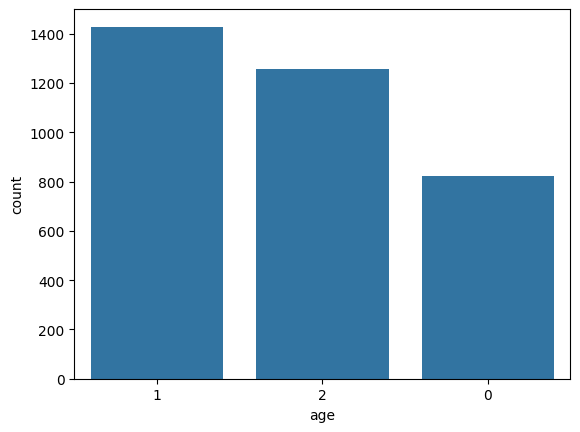

In [343]:

# usunięcie kolumny 'death_year'
df.drop('director_deathYear', axis=1, inplace=True)

# zastąpienie wartości '-' w kolumnie 'director_birthYear' wartością NaN
df['director_birthYear'] = df['director_birthYear'].replace('-', np.nan)
# zamiana typu kolumny 'director_birthYear' na int
df['director_birthYear'] = pd.to_numeric(df['director_birthYear'], errors='coerce')
# utworzenie kolumny 'age' na podstawie kolumn 'production_year' i 'director_birthYear', jesli nie ma birthYear to age = 0
df['age'] = df['production_year'] - df['director_birthYear']
# podział age na 3 przedziały wiekowe
df['age'] = pd.cut(df['age'], bins=[0, 40, 55, 200], labels=['young', 'middle-aged', 'old'])
# encoding kolumny age na int
df['age'] = df['age'].map({'young': 0, 'middle-aged': 1, 'old': 2})
# zamiana wartości NaN na losowe wartości z przedziału (0, 2)
df['age'] = df['age'].fillna(np.random.randint(0, 3))
# usunięcie kolumny 'director_birthYear'
df.drop('director_birthYear', axis=1, inplace=True)

df.head()

countplot = sns.countplot(data=df, x='age', order = df['age'].value_counts().index)

### Podejrzane duplikaty: model ML, który naprawia budżety filmów o tych samych nazwach i dniach produkcji, które faktycznie są innymi filmami

In [344]:
counts = df.groupby(['movie_title', 'production_date']).size()

# Wybierz tylko te wartości, które występują więcej niż raz
counts = counts[counts > 1]

# Konwersja do ramki danych
counts = counts.reset_index(name='count')

In [345]:
counts.head()

,movie_title,production_date,count
0,Alice in Wonderland,2010-03-04,2
1,An Ideal Husband,1999-06-18,2
2,Anna,2019-06-19,2
3,Babylon,2022-12-23,2
4,Black Rain,1989-09-22,2


In [346]:
from sklearn.ensemble import RandomForestRegressor


In [347]:
df_ml = df[["movie_title", 'production_date', "movie_averageRating", "movie_numerOfVotes", "approval_Index", "Production budget $", "Domestic gross $", "Worldwide gross $"]]
counted = df_ml[df_ml["movie_title"].isin(counts["movie_title"])]
non_counted = df_ml[~df_ml["movie_title"].isin(counts["movie_title"])]
non_counted = non_counted[:5000]
y_train = non_counted[["Production budget $", "Domestic gross $", "Worldwide gross $"]]
X_train = non_counted[["movie_averageRating", "movie_numerOfVotes", "approval_Index"]]
X_test = counted[["movie_averageRating", "movie_numerOfVotes", "approval_Index"]]
model = RandomForestRegressor()
predictions = {}

for col in y_train.columns:
    model.fit(X_train, y_train[col])
    predictions[col] = model.predict(X_test)




In [348]:

predictions_df = pd.DataFrame(predictions, index=counted.index)
counted = counted.drop(["Production budget $", "Domestic gross $", "Worldwide gross $"], axis=1)
# Połączenie danych testowych z przewidywanymi wartościami
new_df = pd.concat([counted.reset_index(drop=True), predictions_df.reset_index(drop=True)], axis=1)


In [349]:
new_df

,movie_title,production_date,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $
0,Malevolence,2004-09-10,5.0,3510.0,2.871275,9757500.0,1.028376e+07,9.561420e+06
1,Stronger,2017-09-22,6.9,46243.0,5.321373,21531000.0,1.338881e+07,3.748356e+07
2,Phantom,2013-03-01,7.5,1189.0,3.775488,8752600.0,5.971220e+06,7.397287e+06
3,The Visit,2015-09-10,6.2,137640.0,5.265704,42610000.0,1.172893e+08,2.635273e+08
4,Weekend,2011-09-23,7.6,30966.0,5.650357,11332000.0,1.322169e+07,2.356852e+07
...,...,...,...,...,...,...,...,...
80,The Circle,2017-04-28,4.8,495.0,2.059376,1377820.0,6.543895e+04,2.676162e+05
81,Smile,2022-09-28,6.4,57.0,1.771966,4724270.0,4.606781e+05,1.339011e+06
82,Smile,2022-09-28,6.6,100127.0,5.459414,51643750.0,2.347125e+07,8.176212e+07
83,Dog,2022-02-18,6.5,37536.0,4.905480,26186000.0,2.036443e+07,2.490822e+07


In [350]:
merged_df = pd.merge(df, new_df[['movie_title', 'production_date', 'movie_averageRating', 'Production budget $', 'Domestic gross $', 'Worldwide gross $']], 
                     on=['movie_title', 'production_date', 'movie_averageRating'], how='left')
merged_df


,movie_title,production_date,genres,runtime_minutes,director_name,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $_x,Domestic gross $_x,Worldwide gross $_x,production_year,production_month,month_sin,month_cos,number_of_professions,age,Production budget $_y,Domestic gross $_y,Worldwide gross $_y
0,Kansas City,1996-08-16,"Crime,Drama,Music",116.0,Robert Altman,6.3,5077.0,3.823171,19000000,1353824,1353824,1996,8,-8.660254e-01,-5.000000e-01,3,2,NaN,NaN,NaN
1,Sommersby,1993-02-05,"Drama,Mystery,Romance",114.0,Jon Amiel,6.2,22262.0,4.434679,30000000,50081992,140081992,1993,2,8.660254e-01,5.000000e-01,3,1,NaN,NaN,NaN
2,We Bought a Zoo,2011-12-23,"Comedy,Drama,Family",124.0,Cameron Crowe,7.1,145614.0,6.078636,50000000,75624550,118729073,2011,12,-2.449294e-16,1.000000e+00,3,1,NaN,NaN,NaN
3,The Spy Who Loved Me,1977-07-13,"Action,Adventure,Thriller",125.0,Lewis Gilbert,7.0,110757.0,5.850243,14000000,46800000,185400000,1977,7,-5.000000e-01,-8.660254e-01,3,2,NaN,NaN,NaN
4,Next Friday,2000-01-12,Comedy,98.0,Steve Carr,6.1,41748.0,4.643223,9500000,57176582,59675307,2000,1,5.000000e-01,8.660254e-01,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3501,Soul Food,1997-09-26,"Comedy,Drama",115.0,George Tillman Jr.,7.0,8465.0,4.525906,7500000,43492389,43492389,1997,9,-1.000000e+00,-1.836970e-16,3,0,NaN,NaN,NaN
3502,Mission to Mars,2000-03-10,"Adventure,Sci-Fi,Thriller",114.0,Brian De Palma,5.6,74305.0,4.489366,90000000,60874615,106000000,2000,3,1.000000e+00,6.123234e-17,3,2,NaN,NaN,NaN
3503,Dead Man Walking,1995-12-29,"Crime,Drama",122.0,Tim Robbins,7.5,96843.0,6.203454,11000000,39387284,83088295,1995,12,-2.449294e-16,1.000000e+00,3,0,NaN,NaN,NaN
3504,Barbarian,2022-09-08,"Horror,Mystery,Thriller",102.0,-,7.0,127282.0,5.921866,4500000,40842944,45352337,2022,9,-1.000000e+00,-1.836970e-16,3,1,NaN,NaN,NaN


In [351]:
merged_df['Production budget $'] = merged_df['Production budget $_y'].fillna(merged_df['Production budget $_x'])
merged_df['Domestic gross $'] = merged_df['Domestic gross $_y'].fillna(merged_df['Domestic gross $_x'])
merged_df['Worldwide gross $'] = merged_df['Worldwide gross $_y'].fillna(merged_df['Worldwide gross $_x'])

# Usunięcie zbędnych kolumn
merged_df.drop(['Production budget $_x', 'Domestic gross $_x', 'Worldwide gross $_x',
                'Production budget $_y', 'Domestic gross $_y', 'Worldwide gross $_y'], axis=1, inplace=True)


In [352]:
merged_df.head()

,movie_title,production_date,genres,runtime_minutes,director_name,movie_averageRating,movie_numerOfVotes,approval_Index,production_year,production_month,month_sin,month_cos,number_of_professions,age,Production budget $,Domestic gross $,Worldwide gross $
0,Kansas City,1996-08-16,"Crime,Drama,Music",116.0,Robert Altman,6.3,5077.0,3.823171,1996,8,-8.660254e-01,-0.500000,3,2,19000000.0,1353824.0,1353824.0
1,Sommersby,1993-02-05,"Drama,Mystery,Romance",114.0,Jon Amiel,6.2,22262.0,4.434679,1993,2,8.660254e-01,0.500000,3,1,30000000.0,50081992.0,140081992.0
2,We Bought a Zoo,2011-12-23,"Comedy,Drama,Family",124.0,Cameron Crowe,7.1,145614.0,6.078636,2011,12,-2.449294e-16,1.000000,3,1,50000000.0,75624550.0,118729073.0
3,The Spy Who Loved Me,1977-07-13,"Action,Adventure,Thriller",125.0,Lewis Gilbert,7.0,110757.0,5.850243,1977,7,-5.000000e-01,-0.866025,3,2,14000000.0,46800000.0,185400000.0
4,Next Friday,2000-01-12,Comedy,98.0,Steve Carr,6.1,41748.0,4.643223,2000,1,5.000000e-01,0.866025,2,2,9500000.0,57176582.0,59675307.0


In [353]:
merged_df[merged_df['movie_title'] == 'Weekend'].head()


,movie_title,production_date,genres,runtime_minutes,director_name,movie_averageRating,movie_numerOfVotes,approval_Index,production_year,production_month,month_sin,month_cos,number_of_professions,age,Production budget $,Domestic gross $,Worldwide gross $
565,Weekend,2011-09-23,"Drama,Romance",97.0,-,7.6,30966.0,5.650357,2011,9,-1.0,-1.836970e-16,3,0,11332000.0,13221691.18,23568523.80
1010,Weekend,2011-09-23,"Comedy,Drama",80.0,-,5.8,7.0,0.698560,2011,9,-1.0,-1.836970e-16,3,2,13144390.0,16664386.05,22466151.34
2074,Weekend,2011-09-23,"Action,Comedy,Crime",121.0,-,3.9,705.0,1.749999,2011,9,-1.0,-1.836970e-16,3,1,6050090.0,1505406.85,1345701.88


In [354]:
df = merged_df

In [355]:
df = df.drop(columns=['production_date', 'production_month'])

In [356]:
df.head()

,movie_title,genres,runtime_minutes,director_name,movie_averageRating,movie_numerOfVotes,approval_Index,production_year,month_sin,month_cos,number_of_professions,age,Production budget $,Domestic gross $,Worldwide gross $
0,Kansas City,"Crime,Drama,Music",116.0,Robert Altman,6.3,5077.0,3.823171,1996,-8.660254e-01,-0.500000,3,2,19000000.0,1353824.0,1353824.0
1,Sommersby,"Drama,Mystery,Romance",114.0,Jon Amiel,6.2,22262.0,4.434679,1993,8.660254e-01,0.500000,3,1,30000000.0,50081992.0,140081992.0
2,We Bought a Zoo,"Comedy,Drama,Family",124.0,Cameron Crowe,7.1,145614.0,6.078636,2011,-2.449294e-16,1.000000,3,1,50000000.0,75624550.0,118729073.0
3,The Spy Who Loved Me,"Action,Adventure,Thriller",125.0,Lewis Gilbert,7.0,110757.0,5.850243,1977,-5.000000e-01,-0.866025,3,2,14000000.0,46800000.0,185400000.0
4,Next Friday,Comedy,98.0,Steve Carr,6.1,41748.0,4.643223,2000,5.000000e-01,0.866025,2,2,9500000.0,57176582.0,59675307.0


### Skalowanie - logarytmiczne

array([[<Axes: title={'center': 'runtime_minutes'}>,
        <Axes: title={'center': 'director_name'}>,
        <Axes: title={'center': 'movie_averageRating'}>],
       [<Axes: title={'center': 'movie_numerOfVotes'}>,
        <Axes: title={'center': 'approval_Index'}>,
        <Axes: title={'center': 'production_year'}>],
       [<Axes: title={'center': 'month_sin'}>,
        <Axes: title={'center': 'month_cos'}>,
        <Axes: title={'center': 'number_of_professions'}>],
       [<Axes: title={'center': 'Production budget $'}>,
        <Axes: title={'center': 'Domestic gross $'}>,
        <Axes: title={'center': 'Worldwide gross $'}>]], dtype=object)

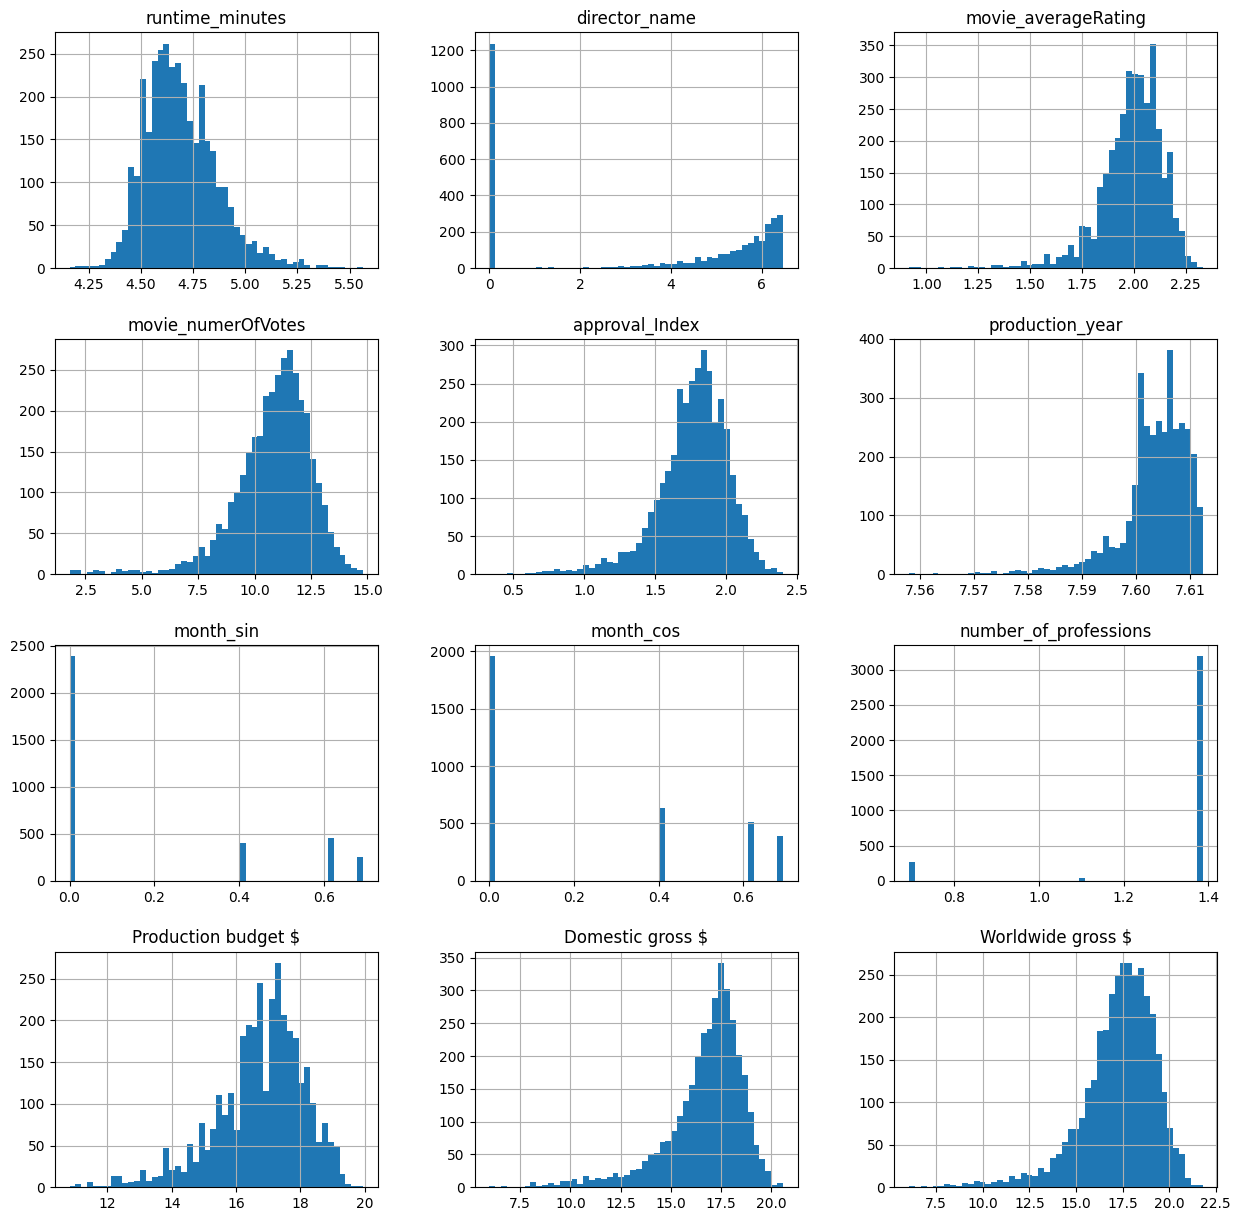

In [358]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
# Zastąp wartości ujemne i zero małą dodatnią wartością
df[numerical_cols] = df[numerical_cols].applymap(lambda x: x if x > 0 else 1e-10)

# Przekształcenie logarytmiczne
df_log = np.log1p(df[numerical_cols])

# Rysowanie histogramu
df_log.hist(bins=50, figsize=(15, 15))
#testy modeli bedzie mozna zrobic na obu wersjach

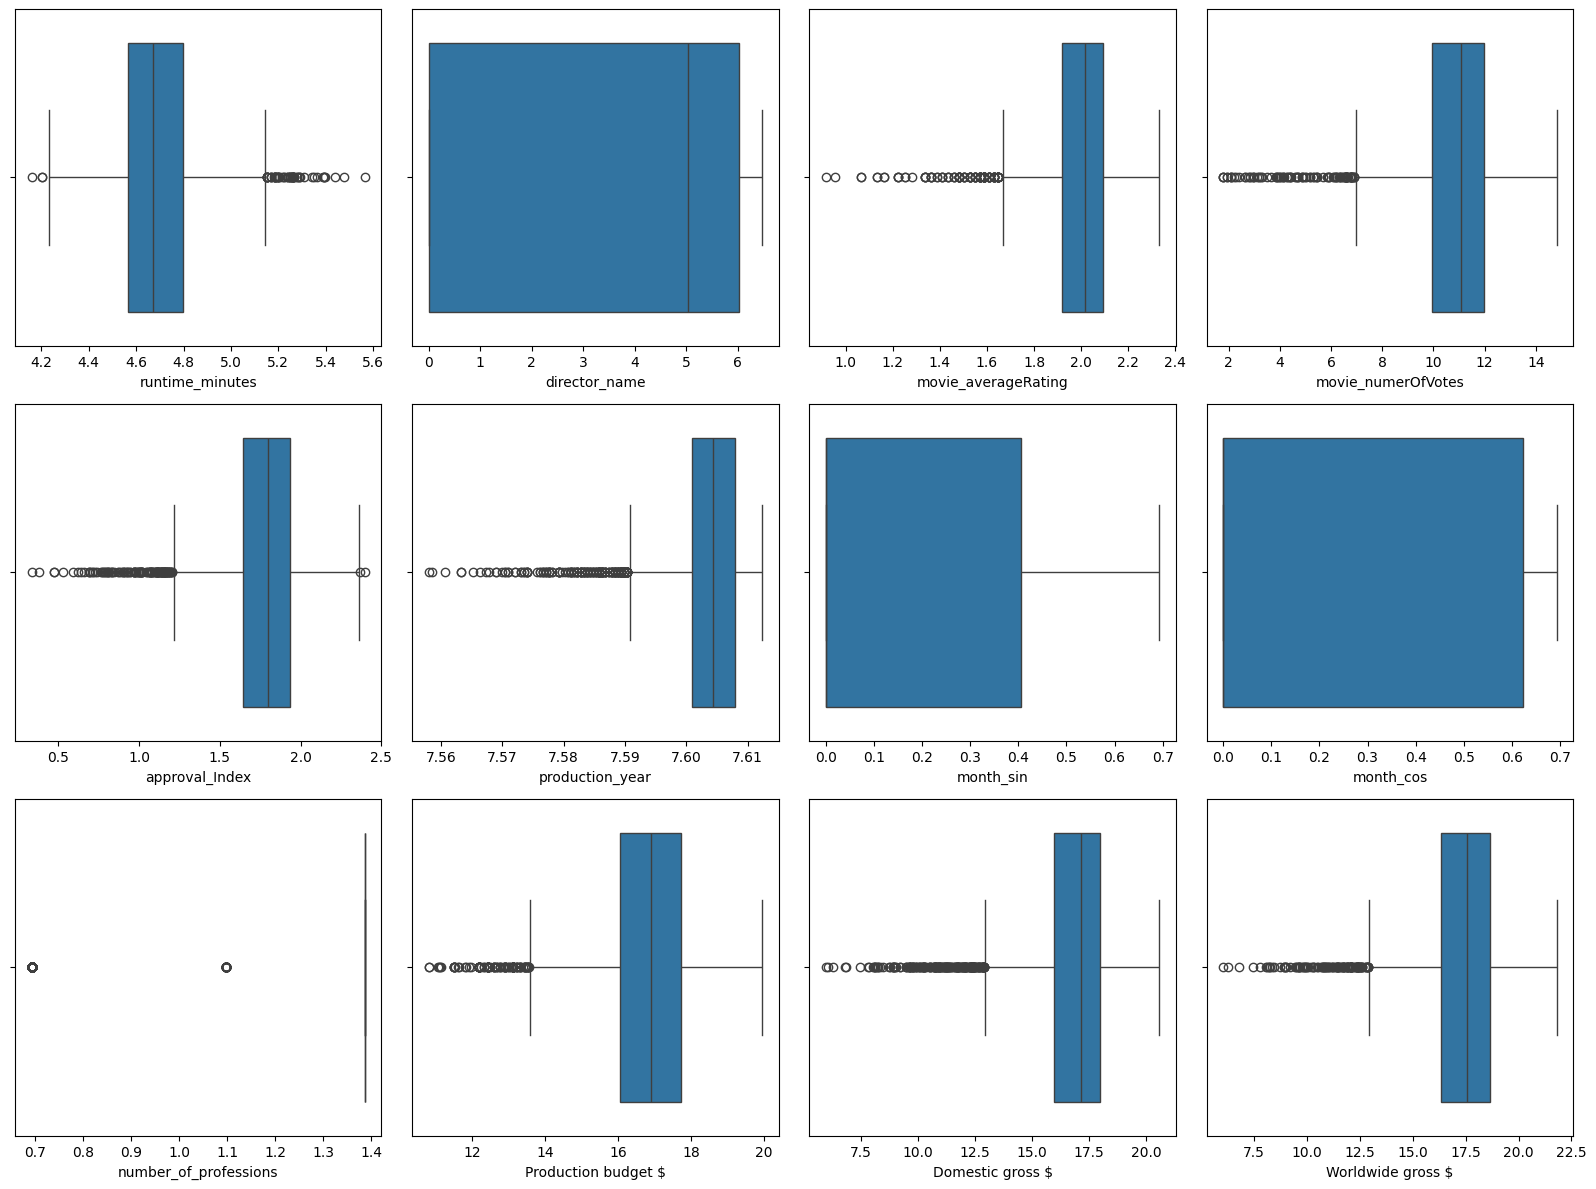

In [359]:
fig, axs = plt.subplots(3, 4, figsize=(16, 12))
axes = axs.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=col, data=np.log1p(df[numerical_cols]), ax= axes[i])
plt.tight_layout() 
plt.show()

### Różne typy transformacji zmiennych numerycznych + pomijamy outliery, zmienne wpisują się w rozkłady

#### Gatunki one hot encoding

In [360]:
#### Gatunki - one hot encoding
# One-hot encoding gatunków
genres_one_hot = df['genres'].str.get_dummies(sep=',')
df = pd.concat([df, genres_one_hot], axis=1)

#usuwanie niepotrzebnych kolumn
df.drop('genres', axis=1, inplace=True)
df.head()

,movie_title,runtime_minutes,director_name,movie_averageRating,movie_numerOfVotes,approval_Index,production_year,month_sin,month_cos,number_of_professions,age,Production budget $,Domestic gross $,Worldwide gross $,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
0,Kansas City,116.0,503.0,6.3,5077.0,3.823171,1996,1.000000e-10,1.000000e-10,3,2,19000000.0,1353824.0,1353824.0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,Sommersby,114.0,299.0,6.2,22262.0,4.434679,1993,8.660254e-01,5.000000e-01,3,1,30000000.0,50081992.0,140081992.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,We Bought a Zoo,124.0,75.0,7.1,145614.0,6.078636,2011,1.000000e-10,1.000000e+00,3,1,50000000.0,75624550.0,118729073.0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,The Spy Who Loved Me,125.0,350.0,7.0,110757.0,5.850243,1977,1.000000e-10,1.000000e-10,3,2,14000000.0,46800000.0,185400000.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,Next Friday,98.0,568.0,6.1,41748.0,4.643223,2000,5.000000e-01,8.660254e-01,2,2,9500000.0,57176582.0,59675307.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Skala logarytmiczna

In [361]:
# df_log - logarytmiczne przekształcenie już zrobione
# df - oryginalne dane

# Standaryzacja
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_log_scaled = scaler.fit_transform(df_log)
df_log_scaled = pd.DataFrame(df_log_scaled, columns=df_log.columns)

# Normalizacja
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_log_normalized = scaler.fit_transform(df_log[numerical_cols])
df_log_normalized = pd.DataFrame(df_log_normalized, columns=numerical_cols)

# Standaryzacja + Normalizacja bez logarytmicznego przekształcenia (uzywajac df)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numerical_cols])
df_scaled = pd.DataFrame(df_scaled, columns=numerical_cols)

scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df_scaled[numerical_cols])
df_normalized_scaled = pd.DataFrame(df_normalized, columns=numerical_cols)

# Sprawdzenie rozkładu
#df_log_scaled.hist(bins=50, figsize=(15, 15))
#df_log_normalized.hist(bins=50, figsize=(15, 15))
#df_normalized_scaled.hist(bins=50, figsize=(15, 15))



In [362]:
df.head()

,movie_title,runtime_minutes,director_name,movie_averageRating,movie_numerOfVotes,approval_Index,production_year,month_sin,month_cos,number_of_professions,age,Production budget $,Domestic gross $,Worldwide gross $,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
0,Kansas City,116.0,503.0,6.3,5077.0,3.823171,1996,1.000000e-10,1.000000e-10,3,2,19000000.0,1353824.0,1353824.0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,Sommersby,114.0,299.0,6.2,22262.0,4.434679,1993,8.660254e-01,5.000000e-01,3,1,30000000.0,50081992.0,140081992.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,We Bought a Zoo,124.0,75.0,7.1,145614.0,6.078636,2011,1.000000e-10,1.000000e+00,3,1,50000000.0,75624550.0,118729073.0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,The Spy Who Loved Me,125.0,350.0,7.0,110757.0,5.850243,1977,1.000000e-10,1.000000e-10,3,2,14000000.0,46800000.0,185400000.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,Next Friday,98.0,568.0,6.1,41748.0,4.643223,2000,5.000000e-01,8.660254e-01,2,2,9500000.0,57176582.0,59675307.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Sprawdzamy Feature Importance

W przypadku klasteryzacji określenie najważniejszych cech jest bardziej skomplikowane bo nie przewidujemy nic, ale tu feature importance za pomocą kilku metoda:

Feature importance za pomocą pca (analizy głównych składowych).

Feature ranking:
1. Feature: month_sin (0.025405564838338945)
2. Feature: number_of_professions (-0.014629104209444077)
3. Feature: production_year (-0.017111499495950894)
4. Feature: month_cos (-0.056562961924234406)
5. Feature: director_name (-0.22320187510277267)
6. Feature: runtime_minutes (-0.24148050707195123)
7. Feature: movie_averageRating (-0.2594635474539242)
8. Feature: Production budget $ (-0.3292183499997231)
9. Feature: Domestic gross $ (-0.4083043157407045)
10. Feature: approval_Index (-0.4156584198614077)
11. Feature: Worldwide gross $ (-0.4281715754775613)
12. Feature: movie_numerOfVotes (-0.43473575126563135)


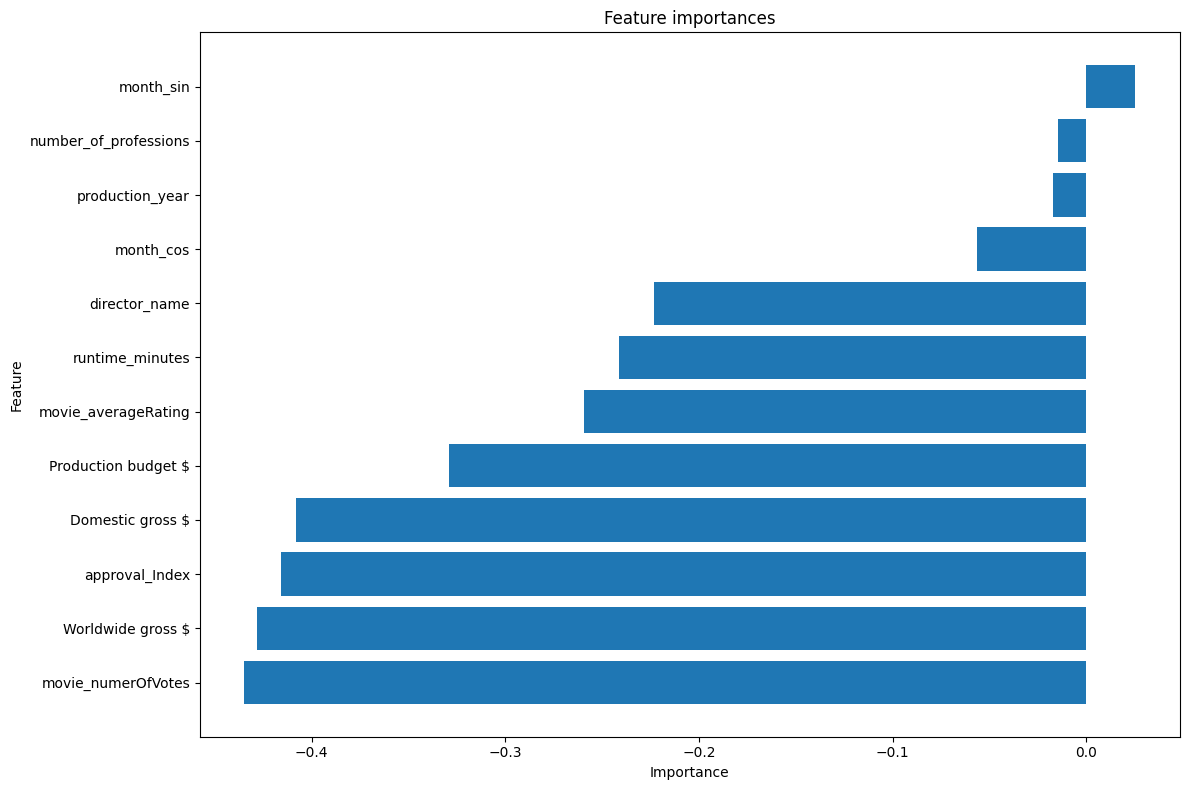

In [363]:
from sklearn.decomposition import PCA
X = df_log_scaled
pca = PCA(n_components=2)

X_pca = pca.fit_transform(X)

features = df_log_scaled.columns
loadings = pca.components_

importance_df = pd.DataFrame({'Feature': features, 'Importance': loadings[0]})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

importances = importance_df['Importance'].values
features = importance_df['Feature'].values

print("Feature ranking:")
for i in range(len(importances)):
    print(f"{i + 1}. Feature: {features[i]} ({importances[i]})")

plt.figure(figsize=(12, 8))
plt.title("Feature importances")
plt.barh(range(len(importances)), importances, align="center")
plt.yticks(range(len(importances)), features)
plt.ylim([-1, len(importances)])
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


dziekie jakies cos

Feature importance za pomocą analizy skupień na podstawie cech. Klasteryzujemy cechy.

In [364]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Remove rows with NaN values
X = X.dropna()

# Or replace NaN values with the mean of the column
# X = X.fillna(X.mean())

# Convert non-numeric columns to numeric using one-hot encoding
X = pd.get_dummies(X)

# Transpose the feature matrix so that features become rows
X_transposed = X.T

# Standardize the features to have mean=0 and variance=1
scaler = StandardScaler()
X_transposed_scaled = scaler.fit_transform(X_transposed)

# Apply clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_transposed_scaled)

# Get cluster assignments for each feature
clusters = kmeans.labels_

# Create a DataFrame for visualization
cluster_df = pd.DataFrame({'Feature': X.columns, 'Cluster': clusters})

print(cluster_df)

                  Feature  Cluster
0         runtime_minutes        0
1           director_name        2
2     movie_averageRating        0
3      movie_numerOfVotes        0
4          approval_Index        0
5         production_year        1
6               month_sin        1
7               month_cos        0
8   number_of_professions        0
9     Production budget $        1
10       Domestic gross $        1
11      Worldwide gross $        1


## Wstępne modelowanie  
-metoda łokcia  
-tsne  
-kmeans  
-wstępne wyszukiwanie

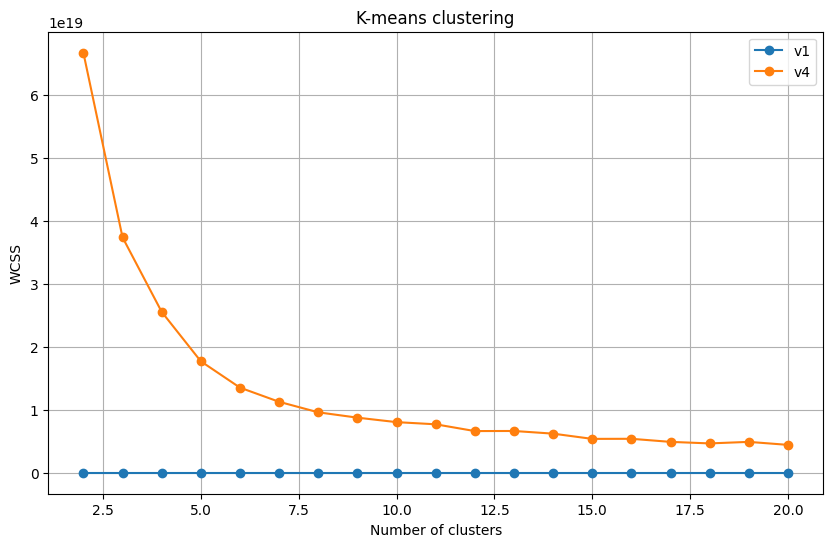

In [366]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#może warto sprawdzić dla tych wersji, idk
v1= df_log_scaled
v2= df_log_normalized
v3= df_normalized_scaled
v4= df.drop("movie_title", axis=1)

#jednak zamiast tych wersji można spróbować innych z różnymi kolumnami, np. bez gatunków, bez reżysera, bez roku produkcji, bez budżetów itp.

#metoda łokcia
from sklearn.cluster import KMeans
from sklearn import metrics

def calculate_wcss(data):
    wcss = []
    for n in range(2, 21):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)
    return wcss

wcss_v1 = calculate_wcss(v1)
#wcss_v2 = calculate_wcss(v2) - na wykresie ten sam wynik co v1
#wcss_v3 = calculate_wcss(v3) - na wykresie ten sam wynik co v1
wcss_v4 = calculate_wcss(v4)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 21), wcss_v1, marker='o', label='v1')
#plt.plot(range(2, 21), wcss_v2, marker='o', label='v2')
#plt.plot(range(2, 21), wcss_v3, marker='o', label='v3')
plt.plot(range(2, 21), wcss_v4, marker='o', label='v4')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('K-means clustering')
plt.legend()
plt.grid()
plt.show()


z wykresu powyżej wnioskuję że chyba jednak się nie powinno standaryzować, a optymalna liczba klastrów dla wariantu v4 się wydaje być koło 5, może 8

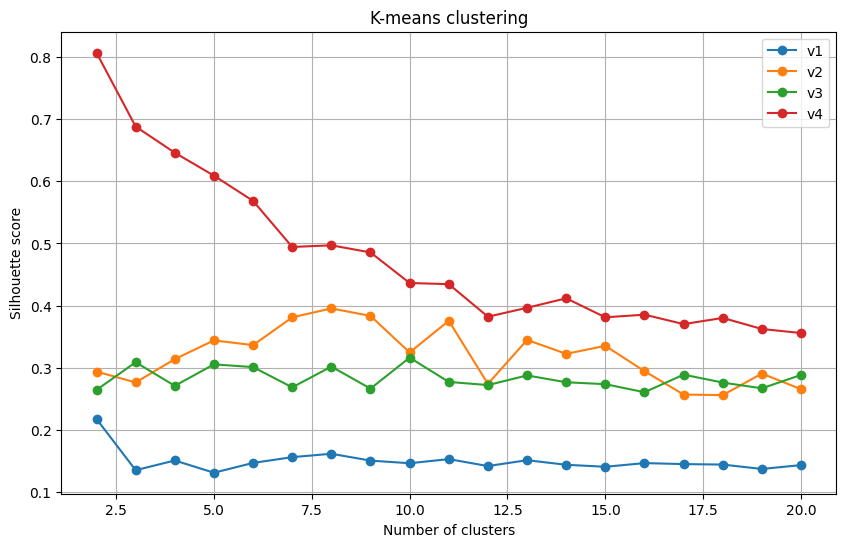

In [367]:
#silhouette score
from sklearn.metrics import silhouette_score

def calculate_silhouette_score(data):
    silhouette_scores = []
    for n in range(2, 21):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        silhouette_scores.append(silhouette_score(data, kmeans.labels_))
    return silhouette_scores

silhouette_scores_v1 = calculate_silhouette_score(v1)
silhouette_scores_v2 = calculate_silhouette_score(v2)
silhouette_scores_v3 = calculate_silhouette_score(v3)
silhouette_scores_v4 = calculate_silhouette_score(v4)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 21), silhouette_scores_v1, marker='o', label='v1')
plt.plot(range(2, 21), silhouette_scores_v2, marker='o', label='v2')
plt.plot(range(2, 21), silhouette_scores_v3, marker='o', label='v3')
plt.plot(range(2, 21), silhouette_scores_v4, marker='o', label='v4')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('K-means clustering')
plt.legend()
plt.grid()
plt.show()

znowu, v4 wygląda najbardziej sensownie 

In [368]:
# co robi silhoutte score
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

# silhouette score - miara jakości podziału
# wartości z przedziału [-1, 1]
# im bliżej 1 tym lepiej
# 0 oznacza przypadek, gdy klastry się nakładają
# wartości ujemne oznaczają, że obserwacje zostały przypisane do złego klastra

### TSNE

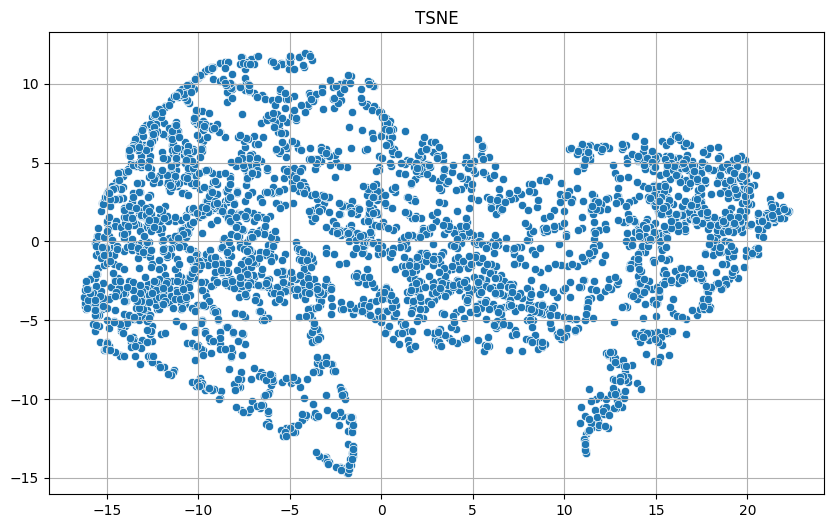

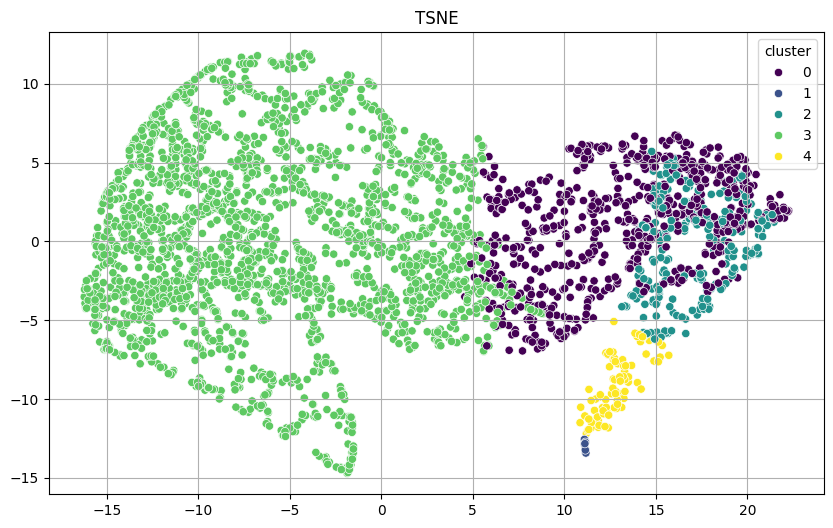

In [369]:
#tsne na wariancie v4
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, random_state=4324)
tsne_results = tsne.fit_transform(v4)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1])
plt.title('TSNE')
plt.grid()
plt.show()

#scatter plot na 5 klastrów
kmeans = KMeans(n_clusters=5, random_state=4324)
kmeans.fit(v4)
v4['cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=v4['cluster'], palette='viridis')
plt.title('TSNE')
plt.grid()
plt.show()


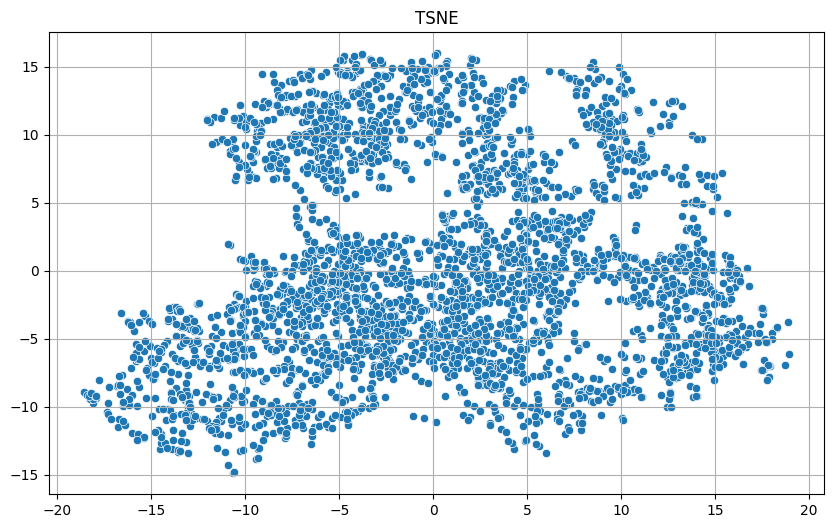

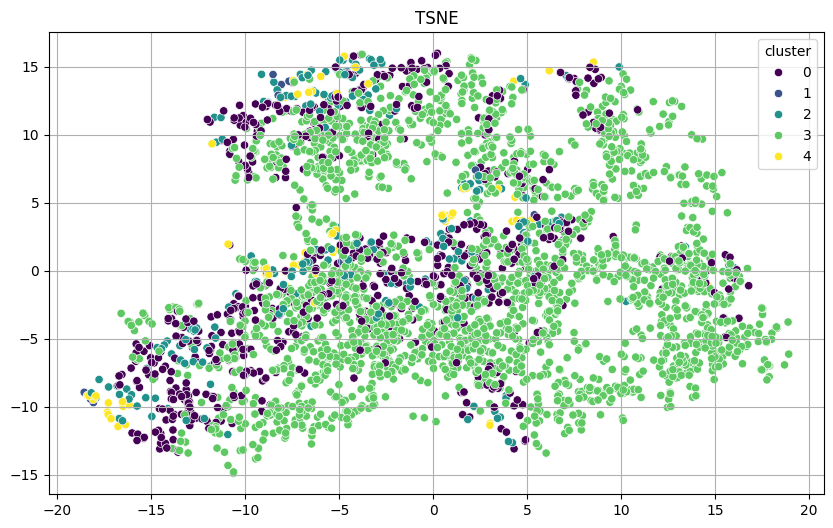

In [370]:
#tsne na wariancie v1
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, random_state=4324)
tsne_results = tsne.fit_transform(v1)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1])
plt.title('TSNE')
plt.grid()
plt.show()

#scatter plot na 5 klastrów
kmeans = KMeans(n_clusters=5, random_state=4324)
kmeans.fit(v4)
v4['cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=v4['cluster'], palette='viridis')
plt.title('TSNE')
plt.grid()
plt.show()

### Usuńmy najmniej znaczące kolumny i sprawdzmy wariant v4 - najlepszy

In [371]:
mod = v4.drop(["month_sin", "month_cos", "number_of_professions", "production_year"], axis=1)
mod

,runtime_minutes,director_name,movie_averageRating,movie_numerOfVotes,approval_Index,age,Production budget $,Domestic gross $,Worldwide gross $,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western,cluster
0,116.0,5.030000e+02,6.3,5077.0,3.823171,2,19000000.0,1353824.0,1353824.0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3
1,114.0,2.990000e+02,6.2,22262.0,4.434679,1,30000000.0,50081992.0,140081992.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
2,124.0,7.500000e+01,7.1,145614.0,6.078636,1,50000000.0,75624550.0,118729073.0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,125.0,3.500000e+02,7.0,110757.0,5.850243,2,14000000.0,46800000.0,185400000.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,98.0,5.680000e+02,6.1,41748.0,4.643223,2,9500000.0,57176582.0,59675307.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3501,115.0,1.950000e+02,7.0,8465.0,4.525906,0,7500000.0,43492389.0,43492389.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
3502,114.0,6.600000e+01,5.6,74305.0,4.489366,2,90000000.0,60874615.0,106000000.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
3503,122.0,5.990000e+02,7.5,96843.0,6.203454,0,11000000.0,39387284.0,83088295.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
3504,102.0,1.000000e-10,7.0,127282.0,5.921866,1,4500000.0,40842944.0,45352337.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,3


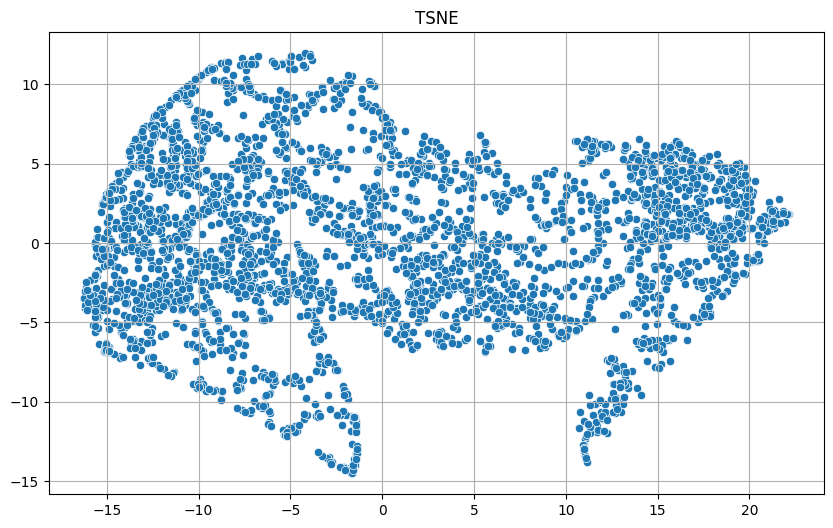

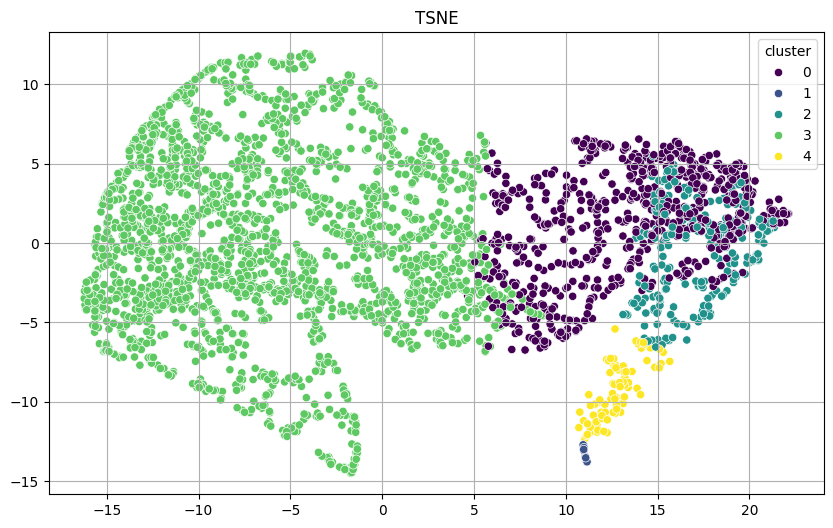

In [374]:
#tsne na wariancie mod
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, random_state=4324)
tsne_results = tsne.fit_transform(mod)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1])
plt.title('TSNE')
plt.grid()
plt.show()

#scatter plot na 5 klastrów
kmeans = KMeans(n_clusters=5, random_state=4324)
kmeans.fit(mod)
mod['cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=mod['cluster'], palette='viridis')
plt.title('TSNE')
plt.grid()
plt.show()

### Porównajmy jakość dla 5 klastrów

In [382]:
kmeans = KMeans(n_clusters=5, random_state=42)

sets = [v1, v2, v3, v4, mod]
for s in sets:
    s["cluster"] = kmeans.fit_predict(s)
    silhouette_avg = silhouette_score(s, s["cluster"])
    var_name = [name for name, var in locals().items() if var is s][0]

    print(f"silhouette_avg for {var_name}: {silhouette_avg}" )


silhouette_avg for df_log_scaled: 0.18888219728423042
silhouette_avg for df_log_normalized: 0.5591523275323632
silhouette_avg for df_normalized_scaled: 0.5914222420962031
silhouette_avg for v4: 0.5982773894748482
silhouette_avg for __: 0.5982773894748881


### Wstępna funkcja rekomendująca

In [383]:
def recommend_similar_movies(movie_title, n_recommendations=5):
    kmeans = KMeans(n_clusters=5, random_state=42)
    df["cluster"] = kmeans.fit_predict(df[features])
    movie_cluster = df[df["movie_title"] == movie_title]["cluster"].values[0]
    similar_movies = df[(df["cluster"] == movie_cluster) & (df["movie_title"] != movie_title)]
    return similar_movies.sample(n=n_recommendations)

In [385]:
recommend_similar_movies("Avengers: Endgame")

,movie_title,runtime_minutes,director_name,movie_averageRating,movie_numerOfVotes,approval_Index,production_year,month_sin,month_cos,number_of_professions,age,Production budget $,Domestic gross $,Worldwide gross $,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western,cluster
3186,Avengers: Infinity War,149.0,1.000000e-10,8.4,1091968.0,8.460958,2018,8.660254e-01,1.000000e-10,1,2,300000000.0,678815482.0,2.048360e+09,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3
2489,Avengers: Age of Ultron,141.0,3.160000e+02,7.3,870573.0,7.214013,2015,8.660254e-01,1.000000e-10,3,1,365000000.0,459005868.0,1.395317e+09,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3
3248,Top Gun: Maverick,130.0,3.130000e+02,8.3,514562.0,7.899179,2022,5.000000e-01,1.000000e-10,3,1,170000000.0,718732821.0,1.484765e+09,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
1720,Avatar,162.0,2.270000e+02,7.9,1316701.0,8.058261,2009,1.000000e-10,1.000000e+00,3,1,237000000.0,785221649.0,2.923706e+09,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3
437,Avatar: The Way of Water,192.0,2.270000e+02,7.8,277543.0,7.061101,2022,1.000000e-10,1.000000e+00,3,2,460000000.0,667830256.0,2.265936e+09,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3
